Michael Uftring   
Indiana University   
Network Science, Spring 2018   
Week#2 Assignment - Measuring the Friendship Paradox

# Measuring the friendship paradox
By now you should have a working Juptyer notebook and be using Python 3 (with Anaconda). If not, then make sure you have done the [Python Setup assignment in Week 0](https://github.com/yy/netsci-course/blob/master/m01-getready/python-setup.md).

To get a better intuitive understanding of the friendship paradox, we are going to work through some problems and examples in this notebook. A few tasks will be left to you to complete and submit in your own notebook. Before we dive into creating our own paradox we will go over some basic commands used in the networkx library.

## Step 1: Using networkx
We are going to start by importing the networkx module:

In [1]:
import networkx as nx

By importing the module this way we can use any of the library's classes and functions by prepending the name of the class or function with: 

```
nx.
```

Networkx has extensive documention with many examples, and I highly suggesting looking over the contents of the [Networkx 2.0 documentation page](https://networkx.github.io/documentation/stable/index.html) to get an idea of the kinds of things networkx can do.

We will start by making a simple undirected graph by hand:

In [2]:
# Creates an instance of a networkx graph.
my_first_graph = nx.Graph() 

# Lets add some nodes to the graph
my_first_graph.add_node(1)
my_first_graph.add_node(2)
my_first_graph.add_node(3)

# Now lets add some connections
my_first_graph.add_edge(1, 2)
my_first_graph.add_edge(3, 2)

We now have our first graph which contains 3 nodes and 2 edges. ```add_node()``` and ```add_edge()``` are **methods** of the class ```Graph```. Methods are member functions of classes in python and can be called from an object by using the ```.``` notation followed by the method name. We can find out some basic information about this graph using networkx functions and some default python functions:

In [3]:
# Lets find out how many nodes the graph has
num_nodes = len(my_first_graph) # len()  is a python function that can be applied to most lists or sequences
print(num_nodes)

3


In [4]:
# We can also get the degree of any node in the graph
node2_degree = my_first_graph.degree(2)
print("Node 2's degree: ",node2_degree)

# Or we can get the neighbors of any node
node2_neighbors = my_first_graph.neighbors(2)
print(node2_neighbors)
print("Node 2's neighbors: ", [n for n in node2_neighbors])

Node 2's degree:  2
[1, 3]
Node 2's neighbors:  [1, 3]


Make sure to review the documentation on both of these functions ([degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html) and [neighbors](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html)) so you are aware what additional arguments you can give. For instance, degree can take a sequence of nodes as an argument and return a sequence of corresponding degrees.

`my_first_graph.neighbors(2)` returns an `iterator` object. It yeilds each successive node that is a neighbor of node 2. [More information on python generators](https://wiki.python.org/moin/Generators). 

We can use a for loop over the iterateor. Alternatively, I used a list comprehension to put it into one line:
```
[n for n in node2_neighbors]
```

This codes creates a list of the neighbors of Node 2. Using a [list comprehension](http://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html) isn't always possible, but it is faster and more succint than the alternative.

We can also combine python control statements with networkx functions:

In [5]:
# Lets get all the neighbors for each node in the graph
for node in my_first_graph.nodes():
    print("Node", node, "'s neighbors:", [n for n in my_first_graph.neighbors(node)])

Node 1 's neighbors: [2]
Node 2 's neighbors: [1, 3]
Node 3 's neighbors: [2]


I wrote a python *for* loop that iterated over the list returned by the networkx graph method ```nodes()```. This graph method returns a list of each node in the network. Similarly, we can loop over edges using ```edges()```.

In [6]:
# Quick example of iterating over edges
for edge in my_first_graph.edges():
    print(edge)

(1, 2)
(2, 3)


Before we move on there is one more thing we would like to do which is visualize our graph. Networkx isn't known for making the prettiest graphs, we will be using [Gephi](https://gephi.org/) for that later, but it can provide us with a basic visualization to get an idea of what our graph looks like.

/opt/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

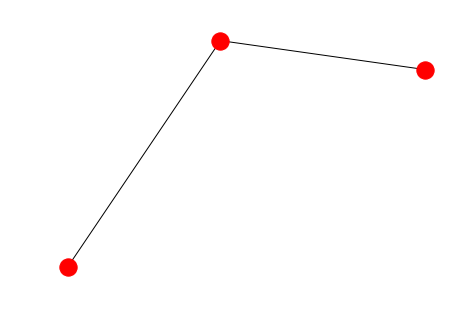

In [7]:
# Draw figures in the notebook
%matplotlib inline
# We will use matplotlib as a backend for the visualization
import matplotlib.pyplot as plt

plt.figure()
# Next we will call networkx's draw function on our graph
nx.draw(my_first_graph)

# And then ask matplotlib to show the figure
plt.show()

## Step 2: Friendship paradox example
Now let's apply some of these tools to the friendship paradox. We will start by using networkx's graph generators to construct a graph for us, then we will calculate the average degree of the network. Once that is done we will calculate the average degree of the neighbors of a few random nodes in the network and compare those values with the degree of the nodes themselves.

/opt/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

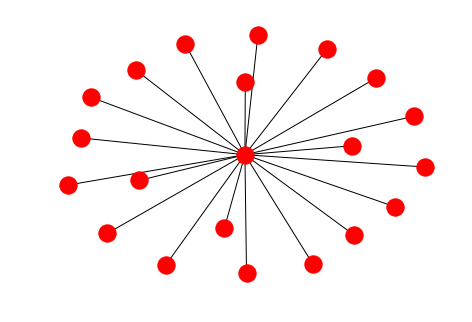

In [8]:
# Use one of networkx's graph generator functions to create a graph
star_graph = nx.star_graph(n=20)
nx.draw(star_graph)
plt.show()

In [9]:
# Lets calculate the average degree of the graph
degree_sum = 0.0
for node in star_graph.nodes():
    degree_sum += star_graph.degree(node)
avg_degree = degree_sum / len(star_graph)
print("Average degree", avg_degree)

Average degree 1.9047619047619047


In [10]:
# Now lets do it in one line using numpy and list comprehension
import numpy as np

# Calculate the average degree of the nodes in the graph
avg_degree = np.mean([star_graph.degree(node) for node in star_graph.nodes()])
print("Average degree:",avg_degree)

Average degree: 1.90476190476


To calculate the mean, I used [numpy's mean function](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html), which can come in handy for quickly calculating the mean of a list or sequence along an axis. So I passed the list comprehension directly to ```np.mean``` and it returned the mean of that list. 

Note: Numpy uses its own data types for carrying out calculations, so if you print a numpy float it will display differently than if you printed a python float, which is why we get the intentional truncation of the value when displayed.

For basic graph information, networkx also has the [info()](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.info.html)
function:

In [11]:
# Alternatively we can use use nx.info() to get the average degree
print(nx.info(star_graph))

Name: star_graph(20)
Type: Graph
Number of nodes: 21
Number of edges: 20
Average degree:   1.9048


### Q1: Average neighbor degree
Now that you have seen some examples of networkx and numpy, I want you to complete the star graph example by writing a function below that calculates the average degree of a node's neighbors. This involves find all of a node's neighbors and then taking the average of their degrees. The input arguments into the function should be a node and a networkx graph. The function should return a single value: the average neighbor degree for the given node. You should [learn about how to define and use Python functions](https://www.google.com/search?q=python+function&oq=python+func&aqs=chrome.0.0j69i57j0l4.2723j1j7&sourceid=chrome&ie=UTF-8) if you're not familiar with them yet. Use the space provided below:

In [74]:
'''
averageNeighborDegree(graph, node)
    calculates the average degree of a node's neighbors
'''
def averageNeighborDegree(graph, node):
    return np.mean(list(graph.degree([n for n in graph.neighbors(node)]).values()))

In [75]:
node = 0
print("Node {} has degree {}, and its average neighbor degree is {}.".format(node, star_graph.degree(node), averageNeighborDegree(star_graph, node)))

Node 0 has degree 20, and its average neighbor degree is 1.0.


### Q2: Viewing the friendship paradox
We would like to check whether the friendship paradox holds for a network. To do this, lets determine what fraction of nodes in the graph have a larger average neighbor degree than their own. The larger the fraction, the stronger the effect of the friendship paradox. 

For each node we need to find its degree, then average neighbor degree (calculated with the previous function you made). If the average is greater, then it holds for that node. To get the fraction, we can count up all the nodes it holds for and divide by the total number of nodes. Write a function below that will do this for a graph:

In [76]:
# Replace with your code
'''
friendshipParadoxIndicator(graph)
    Determine what fraction of nodes in the graph have a larger average neighbor degree 
    than their own.
    The larger the fraction, the stronger the effect of the friendship paradox.
'''
def friendshipParadoxIndicator(graph):
    return sum(1 for i in [averageNeighborDegree(graph, n) > graph.degree(n) for n in graph.nodes()] if i == True) / len(graph)

In [77]:
friendshipParadoxIndicator(star_graph)

0.9523809523809523

Even though the star graph is a fairly trivial example it does display the friendship paradox. It is an extreme case where the average degree of the network is wildly different from the average degree of your neighbors. For all but one node (the center node 0) you have fewer friends than your friends.

You can use the star graph to check if you functions work, since we know it holds in that case.

This concludes the tutorial section of this notebook, if you have any questions about what the code does, or about python or networkx in general, don't be shy to message the instructors (or your peers) on [Slack](https://iu-netsci-online.slack.com/messages) with those questions.

## Step 3: Friendship paradox assignment

Your task is to apply your function to two other types of graphs: a scale-free graph and a random graph. Random graphs are generated from randomly connecting nodes together, with each node having the same probability of being connected to any other node. They don't have much structure to them. Below is a visualization of a random graph:

/opt/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

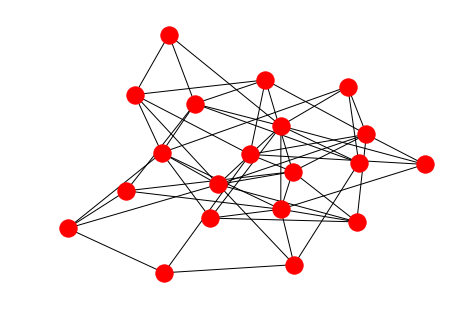

In [62]:
# Draw a random graph with 20 nodes and a connection
# probability of 0.3
rnd_graph = nx.erdos_renyi_graph(n=20, p=0.3)
nx.draw(rnd_graph)
plt.show()

Alternatively, scale-free graphs are graphs where nodes are preferentially attached to nodes with higher degree. This results in structures called 'hubs' which are nodes that have very high degree. Below is a visualization of one such network:

/opt/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

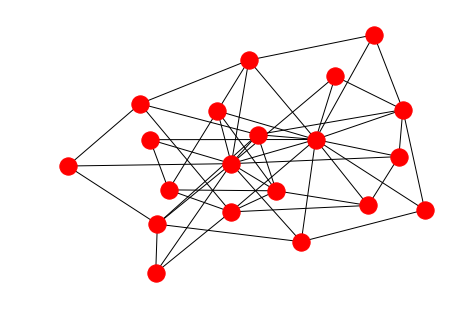

In [63]:
# Draw a scale-free graph with 20 nodes
sf_graph = nx.barabasi_albert_graph(n=20, m=3)
nx.draw(sf_graph)
plt.show()

Unlike in the random graph where nodes tend to have comparable degrees that are situated pretty close to the average, the scale-free graph has many low degree nodes and a few very high degree nodes which we can see in the figure above. Many social networks tend to have this hub-like structure. We will be testing out the friendship paradox on both types of networks.

You can use networkx's generator functions for making the [scale-free graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html) and the [random graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html). 

### Q3: Scale-free graph
For the scale-free graph use the parameters ```n=200``` and ```m=3```. You should answer the following questions:



In [78]:
import numpy as np
def averageDegree(graph):
    return np.mean(list(graph.degree().values()))

In [79]:
n=200
m=3
graph = nx.barabasi_albert_graph(n, m)

#### 1. What is the average degree of the graph?

In [80]:
averageDegree(graph)

5.9100000000000001

#### 2. What fraction of nodes in the graph have a larger average neighbor degree than their degree?

In [81]:
friendshipParadoxIndicator(graph)

0.895

#### 3. Did the friendship paradox occur in the scale-free graph? If so, why did it? If not, why not? (provide your response in the markdown cell below)

The *friendship paradox indicator* for this scale-free graph is 0.895. This indicates that for a vast majority of nodes, their average neighbors degree is higher. 

### Q4: Random graph

For the erdos-renyi graph use the parameters ```n=200``` and ```p=0.2```.



In [82]:
n=200
p=0.2
graph = nx.erdos_renyi_graph(n, p)

#### 1. What is the average degree of the graph?

In [83]:
averageDegree(graph)

39.700000000000003

#### 2. What fraction of nodes in the graph have a larger average neighbor degree than their degree?

In [84]:
friendshipParadoxIndicator(graph)

0.595

#### 3. Did the friendship paradox occur in the random graph? If so, why did it? If not, why not?

For the random graph, the *friendship paradox indicator* is 0.595 which indicates that for slightly over half of the nodes their neighbors have a higer degree. This would suggest that the friendship paradox does exist but to a lesser extent when compared to the scale-free graph above.

#### Lastly: rename your notebook as 'friendship_lastname_firstname' and upload to Canvas in the Friendship paradox assignment section.